In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
import series as s
from download import query_phe as query, download_phe as download, find_latest
from phe import plot_summary, read_csv, load_population, current_and_previous_data
from plotting import per1m_formatter, per1k_formatter, per0k_formatter
from vaccination import vaccination_dashboard, vaccination_changes
import requests

In [21]:
release=None

In [32]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-02-06,2021-02-05,United Kingdom,K02000001,NaN,NaN,219.0,NaN
1,2021-02-06,2021-02-04,United Kingdom,K02000001,14140.0,NaN,498.0,783851.0
2,2021-02-06,2021-02-03,United Kingdom,K02000001,18766.0,NaN,698.0,801949.0
3,2021-02-06,2021-02-02,United Kingdom,K02000001,19558.0,2460.0,744.0,606382.0
4,2021-02-06,2021-02-01,United Kingdom,K02000001,21798.0,2590.0,788.0,643204.0
...,...,...,...,...,...,...,...,...
368,2021-02-06,2020-02-03,United Kingdom,K02000001,0.0,NaN,NaN,NaN
369,2021-02-06,2020-02-02,United Kingdom,K02000001,1.0,NaN,NaN,NaN
370,2021-02-06,2020-02-01,United Kingdom,K02000001,1.0,NaN,NaN,NaN
371,2021-02-06,2020-01-31,United Kingdom,K02000001,2.0,NaN,NaN,NaN


In [33]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-02-06.csv')

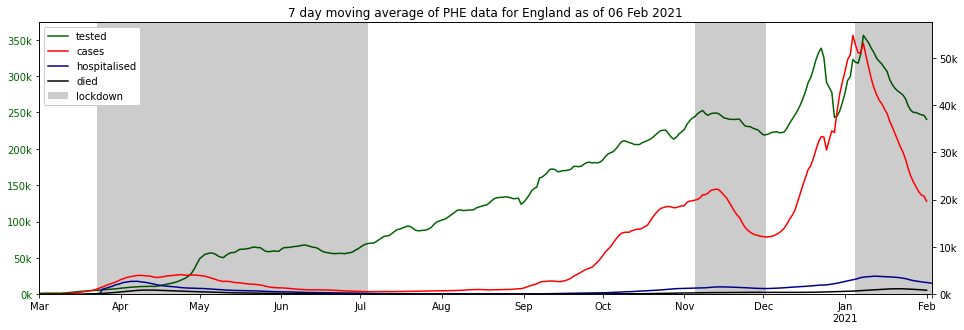

In [2]:
plot_summary(earliest_date='2020-03-01')

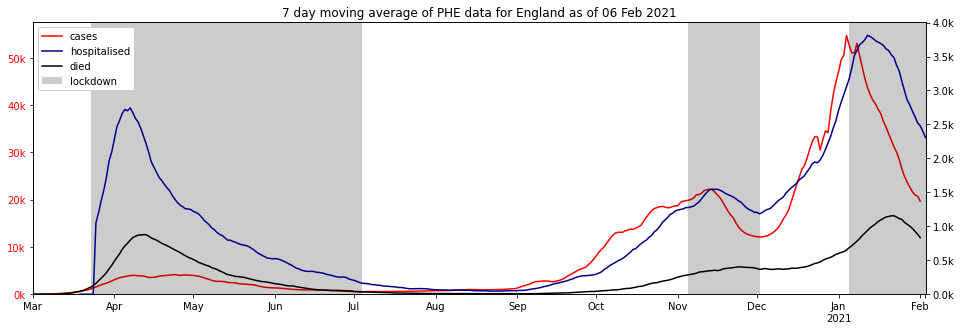

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

In [35]:
download('vaccination', 'nation', *vaccination_new_and_weekly, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-02-06.csv')

In [36]:
download('vaccination_cum', 'nation', *vaccination_cumulative, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_cum_2021-02-06.csv')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,470723.0,9831897.0,9361174.0,56286961,0.836291,16.631159,82.532550
1,Northern Ireland,N92000002,26531.0,289889.0,263358.0,1893667,1.401038,13.907303,84.691659
2,Scotland,S92000003,10460.0,786427.0,775967.0,5463300,0.191459,14.203265,85.605275
3,Wales,W92000004,2471.0,556997.0,554526.0,3152879,0.078373,17.587925,82.333702


'partial: 11,465,210'

'full: 510,185'

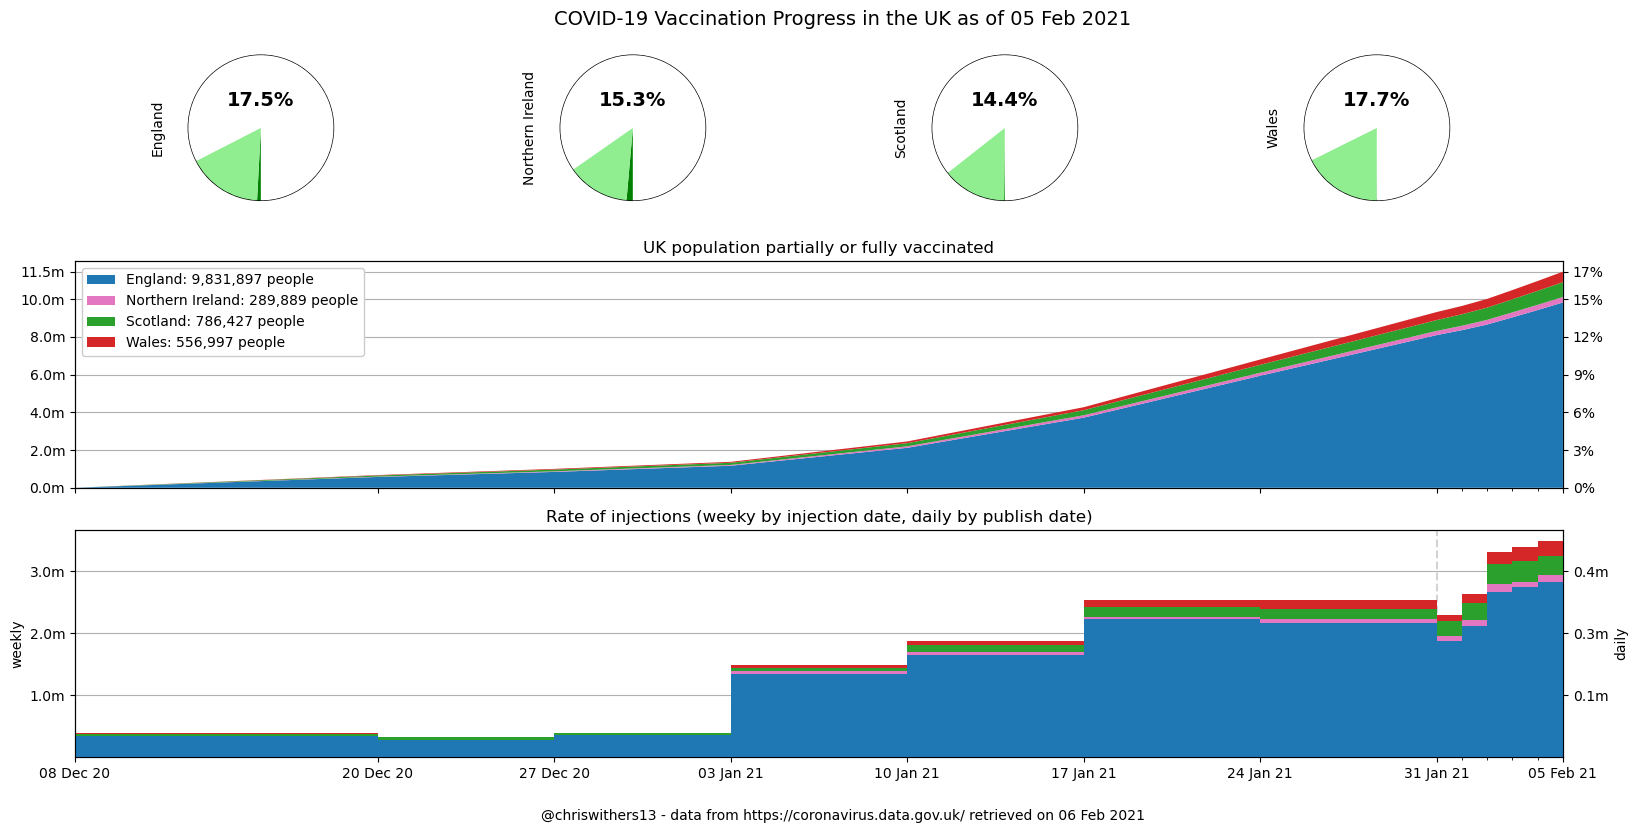

In [37]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [38]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,05 Feb 21,"+401,636","+1,941","+1,941","+9,831,897","+470,723","+470,723"
Northern Ireland,05 Feb 21,"+14,657",+484,+484,"+289,889","+26,531","+26,531"
Scotland,05 Feb 21,"+43,915",+803,+803,"+786,427","+10,332","+10,332"
Wales,05 Feb 21,"+33,955",+836,+836,"+556,997","+2,471","+2,471"


In [39]:
download(nation, nation, new_admissions, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-02-06.csv')

In [40]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-02-06.csv')

In [41]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-02-06.csv')